Chapter 9 - Support Vector Machines - q5

# (a)

In [1]:
set.seed(1)
x1 = runif(500)-0.5
x2 = runif(500)-0.5
y=1*((x1^2-x2^2)>0)

# (b)

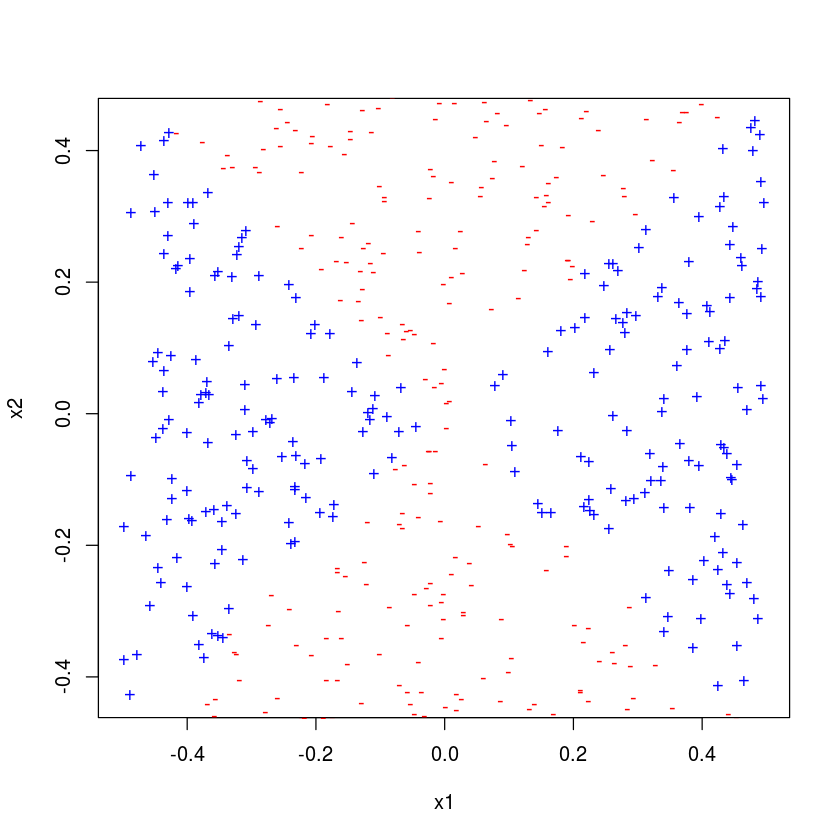

In [41]:
dat = cbind(x1,x2)
positive.class = dat[as.factor(y)==1,]
negative.class = dat[as.factor(y)==0,]
plot(positive.class,col="blue",pch="+")
points(negative.class,col="red",pch="-")

# (c)

In [49]:
#dat = data.frame(x=cbind(x1,x2),y=as.factor(y))
lgsfit = glm(as.factor(y)~x1+x2,family=binomial)
summary(lgsfit)


Call:
glm(formula = as.factor(y) ~ x1 + x2, family = binomial)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.179  -1.139  -1.112   1.206   1.257  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.087260   0.089579  -0.974    0.330
x1           0.196199   0.316864   0.619    0.536
x2          -0.002854   0.305712  -0.009    0.993

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 692.18  on 499  degrees of freedom
Residual deviance: 691.79  on 497  degrees of freedom
AIC: 697.79

Number of Fisher Scoring iterations: 3


# (d)

In [60]:
data = data.frame(cbind(x1,x2))
prob = predict(lgsfit,newdata=data,type="response")
pred = rep(0,length(prob))
pred[prob>=0.5]=1

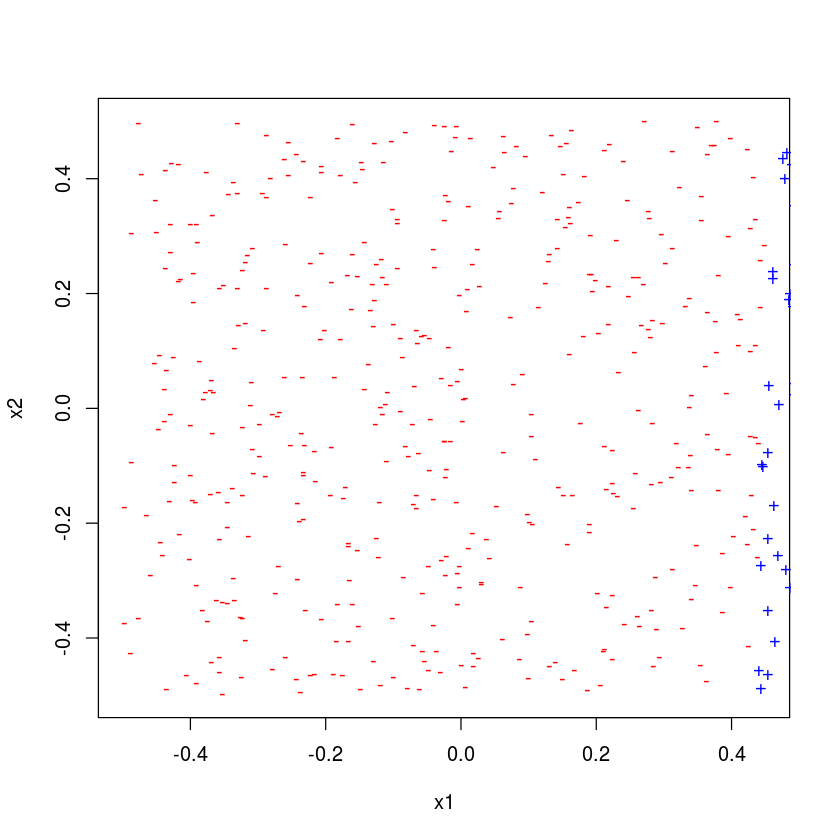

In [61]:
positive.class = data[pred==1,]
negative.class = data[pred==0,]
plot(negative.class,col="red",pch="-")
points(positive.class,col="blue",pch="+")

# (e)

In [62]:
glmfit = glm(y~poly(x1,2)+I(x1*x2)+poly(x2,2),family=binomial)
summary(glmfit)

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = y ~ poly(x1, 2) + I(x1 * x2) + poly(x2, 2), family = binomial)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-8.240e-04  -2.000e-08  -2.000e-08   2.000e-08   1.163e-03  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)    -102.2     4302.0  -0.024    0.981
poly(x1, 2)1   2715.3   141109.5   0.019    0.985
poly(x1, 2)2  27218.5   842987.2   0.032    0.974
I(x1 * x2)     -206.4    41802.8  -0.005    0.996
poly(x2, 2)1   -279.7    97160.4  -0.003    0.998
poly(x2, 2)2 -28693.0   875451.3  -0.033    0.974

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6.9218e+02  on 499  degrees of freedom
Residual deviance: 3.5810e-06  on 494  degrees of freedom
AIC: 12

Number of Fisher Scoring iterations: 25


# (f)

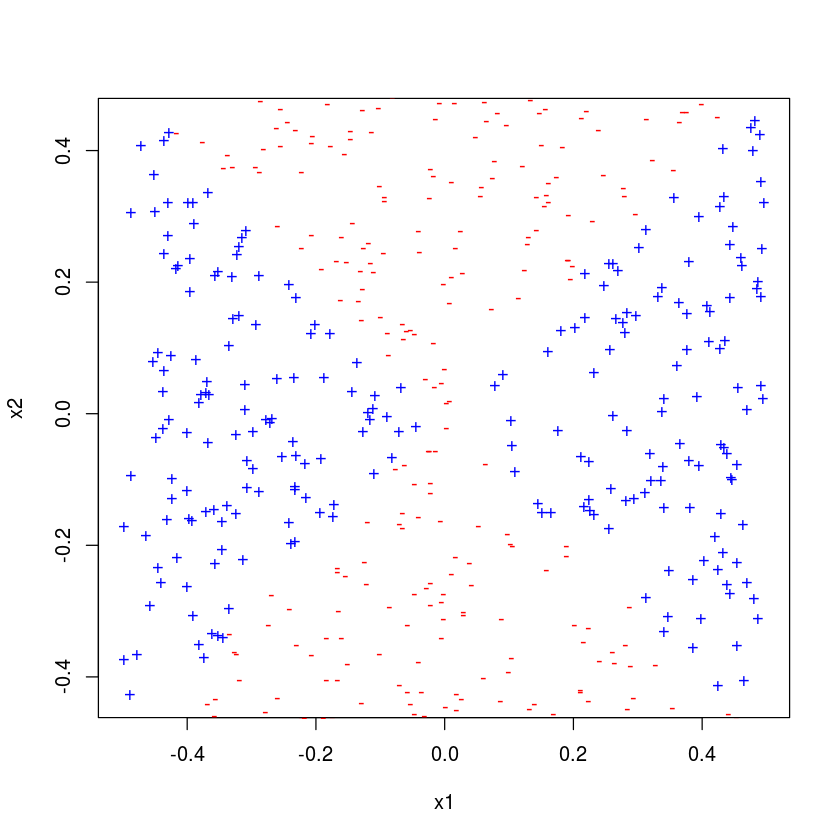

In [67]:
data = data.frame(cbind(x1,x2))
prob = predict(glmfit,newdata=data,type="response")
pred = rep(0,length(prob))
pred[prob>=0.5]=1
positive.class = data[pred==1,]
negative.class = data[pred==0,]
plot(positive.class,col="blue",pch="+")
points(negative.class,col="red",pch="-")

# (g)

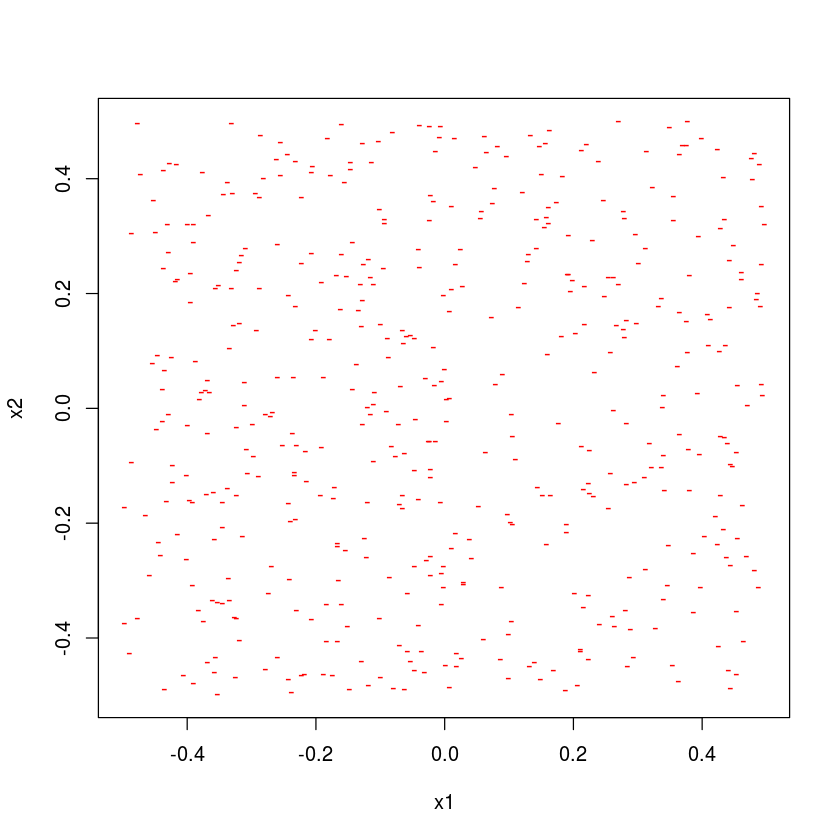

In [68]:
library(e1071)
svmfit = svm(as.factor(y)~x1+x2,kernel="linear",cost=0.1)
data = cbind(x1,x2)
pred = predict(svmfit,data)
positive.class = data[pred==1,-3]
negative.class = data[pred==0,-3]
plot(negative.class,col="red",pch="-")
points(positive.class,col="blue",pch="+")

The linear kernel predicts a negative class for all the data samples

# (h)

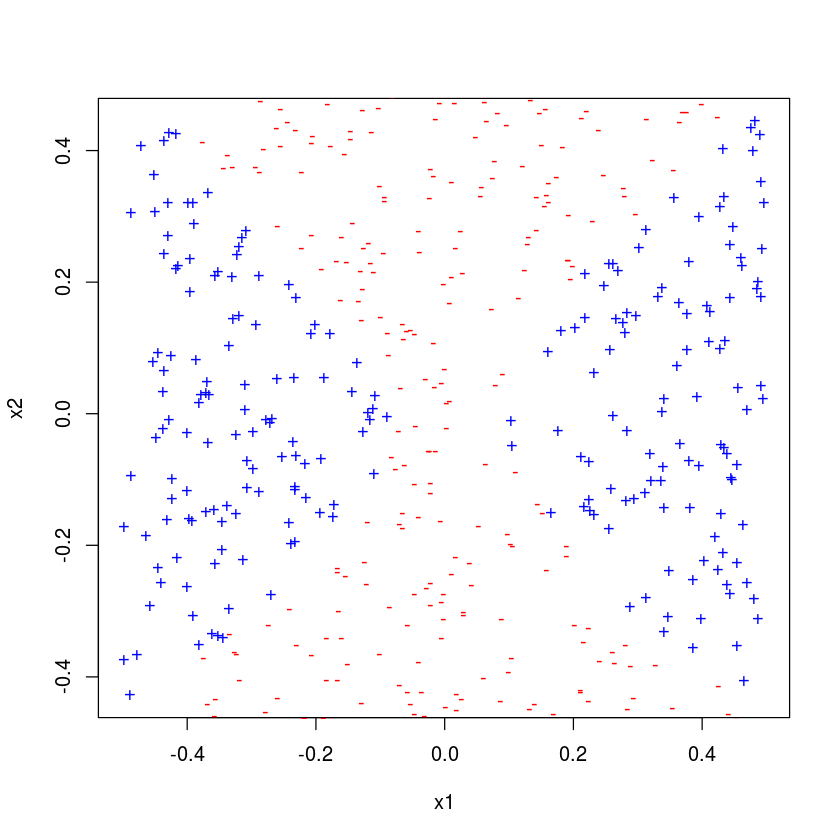

In [40]:
svmfit = svm(as.factor(y)~x1+x2,kernel="radial",gamma=1)
data = cbind(x1,x2)
pred = predict(svmfit,data)
positive.class=data[pred==1,]
negative.class=data[pred==0,]
plot(positive.class,col="blue",pch="+")
points(negative.class,col="red",pch="-")

# (i)

The logistic regression and svm using a linear kernal are unable to find a non-linear decision boundary. However, the svm with radial kernal and the logistic regression with some transformation of the features can find the non-linear decision boundary. 